<a href="https://colab.research.google.com/github/yenlung/Python-AI-Book/blob/main/%E5%86%92%E9%9A%AA%E5%89%AF%E6%9C%AC05_%E5%92%8C_AI_PK_%E7%9C%8B%E8%AA%B0%E6%AF%94%E8%BC%83%E6%9C%83%E8%AA%8D_IVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

使用之前我們學過的人臉辨識, 來跟 AI PK 辨識韓國 K-POP 女團 IVE 或其他任何你想 PK 的團體。

另外, Colab 加入 AI 輔助功能, 寫到不會的地方, 還可以問 Colab 哦。

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 安裝 DeepFace 套件

In [4]:
!pip install deepface

In [5]:
from deepface import DeepFace
from PIL import Image
import os

### 2. 創造資料夾

你想創造的成員, 用逗號隔開。

In [6]:
members = "兪真유진,員瑛원영,秋天가을,Liz리즈,Rei레이,李瑞이서".split(',')

In [7]:
members

['兪真유진', '員瑛원영', '秋天가을', 'Liz리즈', 'Rei레이', '李瑞이서']

In [8]:
# prompt: 建立 photos 資料夾, 並為上面 members 串列中毎個都建一個資料夾。

for member in members:
    os.makedirs(f'./photos/{member}', exist_ok=True)


In [9]:
photo_folder = "/content/photos/"

請在各資料夾中, 至少放入一張照片。以下是簡單的秀圖函式。

In [10]:
def show_image(*args):
    k = len(args)
    fig = plt.figure(figsize=(5*k, 5))
    for i, photo in enumerate(args):
        plt.subplot(1,k,i+1)
        plt.axis('off')
        plt.axis('equal')
        img = Image.open(photo)
        plt.imshow(img)

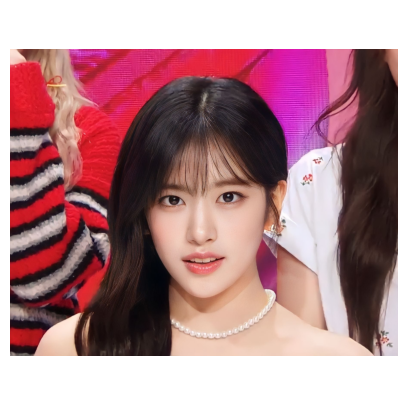

In [12]:
img_path = photo_folder + "兪真유진/yujin.jpg"
show_image(img_path)

### 3. 建立測試照片

建一個 `test` 資料夾, 放測試照片。

In [13]:
# prompt: 建一個 "test" 資料夾

os.makedirs('./test', exist_ok=True)


In [14]:
test_folder = "/content/test/"

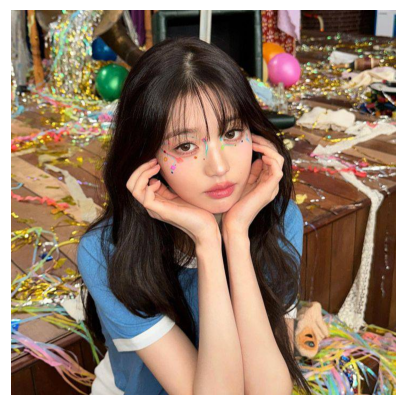

In [16]:
img = test_folder + "test01.jpg"
show_image(img)

這裡會把一張照片, 去和 `db_path` 資料夾下所有照片比對, 看最像誰。

In [17]:
df = DeepFace.find(img, db_path=photo_folder,
                   enforce_detection=False)

Finding representations:   0%|          | 0/6 [00:00<?, ?it/s]

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5

  0%|          | 0.00/580M [00:00<?, ?B/s]
  0%|          | 1.05M/580M [00:00<01:04, 9.00MB/s]
  1%|          | 3.15M/580M [00:00<00:40, 14.4MB/s]
  1%|          | 6.29M/580M [00:00<00:26, 21.5MB/s]
  2%|▏         | 12.1M/580M [00:00<00:16, 34.4MB/s]
  4%|▍         | 22.5M/580M [00:00<00:09, 57.7MB/s]
  7%|▋         | 40.9M/580M [00:00<00:05, 98.3MB/s]
 12%|█▏        | 71.8M/580M [00:00<00:03, 165MB/s] 
 20%|█▉        | 115M/580M [00:00<00:01, 246MB/s] 
 25%|██▍       | 144M/580M [00:00<00:01, 258MB/s]
 32%|███▏      | 183M/580M [00:01<00:01, 299MB/s]
 37%|███▋      | 214M/580M [00:01<00:01, 300MB/s]
 42%|████▏     | 244M/580M [00:01<00:01, 292MB/s]
 48%|████▊     | 277M/580M [00:01<00:01, 301MB/s]
 53%|█████▎    | 307M/580M [00:01<00:00, 296MB/s]
 58%|█████▊    | 339M/580M [00:01<00:00, 301MB/s]
 64%|██████▍   | 371M/580M [00:01<0

Representations stored in /content/photos//representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  24.31713581085205  seconds


看一下判斷的結果。

In [18]:
df

[                          identity  source_x  source_y  source_w  source_h  \
 0  /content/photos/Liz리즈/liz.jpg         0         0       719       719   
 1  /content/photos/Liz리즈/liz.jpg         0         0       719       719   
 
    VGG-Face_cosine  
 0         0.186853  
 1         0.271750  ]

慢慢的來看, 首先 `df[0]` 是一個 DataFrame

In [21]:
df[0]

,identity,source_x,source_y,source_w,source_h,VGG-Face_cosine
0,/content/photos/Liz리즈/liz.jpg,0,0,719,719,0.186853
1,/content/photos/Liz리즈/liz.jpg,0,0,719,719,0.271750


取第一個。

In [22]:
df[0].identity[0]

'/content/photos/Liz리즈/liz.jpg'

記得我們資料夾名稱就是答案!

In [23]:
df[0].identity[0].split('/')[-2]

'Liz리즈'

### 4. 寫成一個判斷小函式

In [24]:
def rec(img):
    df = DeepFace.find(img, db_path=photo_folder,
                       enforce_detection=False)
    try:
        result = df[0].identity[0].split('/')[-2]
    except:
        result = "我不知道"
    return result

In [25]:
img = test_folder + "test02.jpg"

In [26]:
rec(img)

There are  7  representations found in  representations_vgg_face.pkl
find function lasts  1.0509836673736572  seconds


'Liz리즈'

### 5. 簡單 PK 小程式

In [27]:
from ipywidgets import interact_manual

In [33]:
def pk(img_file, name):
    img = test_folder + img_file
    my_ans = rec(img)
    show_image(img)
    plt.show()
    print(f"我的答案是: {my_ans}")

In [34]:
interact_manual(pk, img_file=['test01.jpg', 'test02.jpg'], name=members);

interactive(children=(Dropdown(description='img_file', options=('test01.jpg', 'test02.jpg'), value='test01.jpg…